# Ataques estadísticos: Análisis de frecuencias

## Funciones auxiliares

In [4]:
def ngramas(texto, nLetras):
    """Divide el texto en ngramas"""
    texto = texto.replace(" ", "")
    return [texto[i:i+nLetras] for i in range(len(texto)-nLetras+1)]

In [5]:
from collections import Counter
import pandas as pd

def frec_ngramas(texto,nLetras):
    """Calcula las frecuencia de los ngramas de un texto"""
    ng = ngramas(texto,nLetras)
    frecuencias = Counter(ng)
    return pd.DataFrame(frecuencias.most_common(), columns=['letra','frecuencia'])

In [7]:
def leer_frecuencias(archivo):
    """Lee un fichero con las frecuencias de los ngramas para el idioma español"""
    return pd.read_csv(archivo, sep =" ", names=["letra", "frecuencia"])

In [8]:
def leer_texto_cifrado(texto_cifrado,nLetras):
    """Lee el texto cifrado y calcula las frecuencias de ngramas"""
    with open(texto_cifrado) as f:
        texto_cifrado = f.readlines()[0]
    return frec_ngramas(texto_cifrado, nLetras)

### Testeando las funciones auxiliares

In [9]:
leer_texto_cifrado("texto_cifrado.txt",2)

,letra,frecuencia
0,KL,471
1,HV,437
2,XV,388
3,LF,385
4,LU,378
...,...,...
342,GY,1
343,YT,1
344,GN,1
345,NK,1


In [10]:
leer_frecuencias("spanish_monograms.txt")

,letra,frecuencia
0,E,10912000
1,A,10301872
2,O,7398419
3,S,6128524
4,N,5838540
5,I,5694616
6,R,5450913
7,L,4808679
8,D,4237020
9,C,3648080


In [11]:
frec_ngramas("Esto es un texto de prueba",2)

,letra,frecuencia
0,to,2
1,Es,1
2,st,1
3,oe,1
4,es,1
5,su,1
6,un,1
7,nt,1
8,te,1
9,ex,1


In [12]:
ngramas("Esto es un texto de una prueba",2)

['Es',
 'st',
 'to',
 'oe',
 'es',
 'su',
 'un',
 'nt',
 'te',
 'ex',
 'xt',
 'to',
 'od',
 'de',
 'eu',
 'un',
 'na',
 'ap',
 'pr',
 'ru',
 'ue',
 'eb',
 'ba']

# Análisis de monogramas (letras)

In [13]:
monograma_es = leer_frecuencias("spanish_monograms.txt")

In [14]:
monograma_es.head(10)

,letra,frecuencia
0,E,10912000
1,A,10301872
2,O,7398419
3,S,6128524
4,N,5838540
5,I,5694616
6,R,5450913
7,L,4808679
8,D,4237020
9,C,3648080


<AxesSubplot: xlabel='letra'>

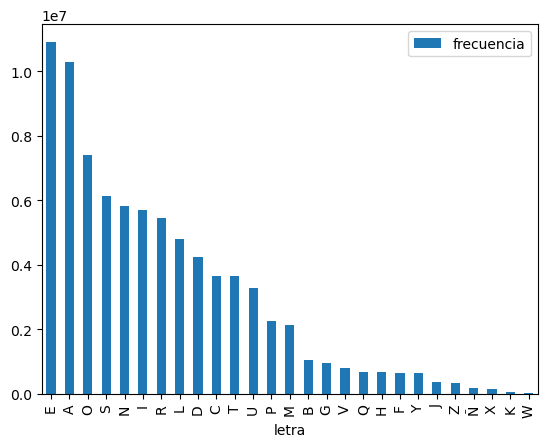

In [15]:
monograma_es.plot('letra','frecuencia', kind="bar")

In [16]:
monograma_cifrado = leer_texto_cifrado("texto_cifrado.txt",1)

In [17]:
monograma_cifrado.head(10)

,letra,frecuencia
0,H,2609
1,L,2343
2,X,1710
3,V,1502
4,G,1261
5,F,1242
6,U,1195
7,T,1188
8,K,980
9,A,758


<AxesSubplot: xlabel='letra'>

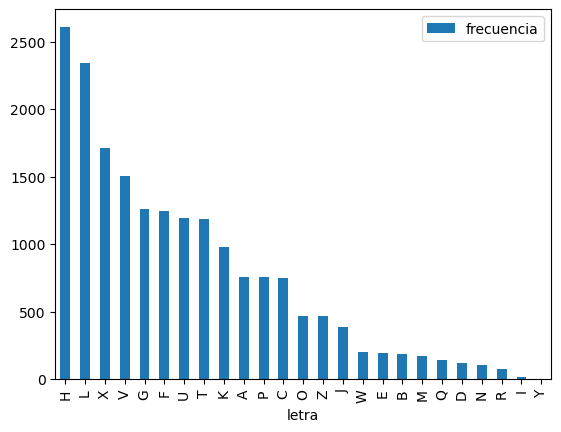

In [18]:
monograma_cifrado.plot('letra','frecuencia', kind="bar")

In [19]:
import string
{letra:None for letra in string.ascii_lowercase}

{'a': None,
 'b': None,
 'c': None,
 'd': None,
 'e': None,
 'f': None,
 'g': None,
 'h': None,
 'i': None,
 'j': None,
 'k': None,
 'l': None,
 'm': None,
 'n': None,
 'o': None,
 'p': None,
 'q': None,
 'r': None,
 's': None,
 't': None,
 'u': None,
 'v': None,
 'w': None,
 'x': None,
 'y': None,
 'z': None}

# Análisis de bigramas

In [21]:
bigramas_es = leer_frecuencias("spanish_bigrams.txt")

In [22]:
bigramas_es.head(10)

,letra,frecuencia
0,DE,2088635
1,ES,1882962
2,EN,1850294
3,EL,1638128
4,LA,1464005
5,OS,1460757
6,ON,1307790
7,AS,1268034
8,ER,1239281
9,RA,1197125


In [23]:
bigramas_cifrado  = leer_texto_cifrado("texto_cifrado.txt",2)

In [24]:
bigramas_cifrado.head(10)

,letra,frecuencia
0,KL,471
1,HV,437
2,XV,388
3,LF,385
4,LU,378
5,UH,372
6,LV,348
7,LG,310
8,HF,282
9,HK,279


# Análisis de Trigramas

In [25]:
trigramas_es= leer_frecuencias("spanish_trigrams.txt")

In [26]:
trigramas_es.head(10)

,letra,frecuencia
0,DEL,601928
1,QUE,594436
2,ENT,538864
3,ION,450424
4,ELA,439787
5,CON,431589
6,SDE,417925
7,ADE,408906
8,CIO,398883
9,NTE,394852


In [27]:
trigramas_cifrado = leer_texto_cifrado("texto_cifrado.txt",3)

In [28]:
trigramas_cifrado.head(10)

,letra,frecuencia
0,BAL,160
1,KLU,159
2,VKL,117
3,HJH,115
4,UXV,111
5,LUH,107
6,UHV,99
7,HKL,97
8,LFC,96
9,XKL,94


# Análisis de Cuatrigramas

In [31]:
cuatrigramas_es = leer_frecuencias("spanish_quadgrams.txt")

In [32]:
cuatrigramas_es.head(10)

,letra,frecuencia
0,CION,336012
1,DELA,262918
2,ACIO,216501
3,ENTE,195858
4,ESTA,174928
5,ESDE,174010
6,PARA,148049
7,ONES,136017
8,SDEL,133576
9,OSDE,132251


In [33]:
cuatrigramas_cifrado = leer_texto_cifrado("texto_cifrado.txt",4)

In [35]:
cuatrigramas_cifrado.head(10)

,letra,frecuencia
0,KLUH,81
1,VKLU,51
2,HBAL,48
3,HVKL,39
4,XVKL,38
5,LVKL,37
6,HKLU,36
7,HJHF,35
8,VBAL,34
9,BALU,33


In [54]:
"""[1°columna = letra cifrada] : [2°columna = letra más frecuente]"""
alfabeto_permutado = {
    'a': 'u',
    'b': 'q',
    'c': 't',
    'd': None,
    'e': None,
    'f': 'n',
    'g': 'r',
    'h': 'a',
    'i': 'x',
    'j': 'b',
    'k': 'd',
    'l': 'e',
    'm': None,
    'n': None,
    'o': 'p',
    'p': 'c',
    'q': 'h',
    'r': None,
    's': None,
    't': 'i',
    'u': 'l',
    'v': 's',
    'w': None,
    'x': 'o',
    'y': None,
    'z': 'm'
}

# Algoritmo de descifrado

In [55]:
def algoritmo_descifrado(texto_cifrado,alfabeto_permutado):
    """Descifra el texto cifrado a partir de la clave de descifrado."""
    texto_plano = ""
    with open(texto_cifrado) as f:
        texto_cifrado = f.readlines()[0]
    for letra in texto_cifrado:
        if not alfabeto_permutado[letra.lower()]:
            texto_plano += letra
        else:
            texto_plano += alfabeto_permutado[letra.lower()]
    return texto_plano


In [56]:
algoritmo_descifrado('texto_cifrado.txt',alfabeto_permutado)

'alrededordelacatedralseextendiaenestrechaRonaelprimitiEorecintodeEetustacomprendialoquesellamabaelbarriodelaencimadaMdominabatodoelpuebloquesehabiaidoestirandopornoroesteMporsudestedesdelatorreseEeiaenalWunospatiosMNardinesdecasasEieNasMruinosasrestosdelaantiWuamurallaconEertidosenterradosoparedesmedianerasentrehuertosMcorraleslaencimadaeraelbarrionobleMelbarriopobredeEetustalosmaslinaNudosMlosmasandraNososEiEianallicercaunosdeotrosaquellosasusanchaslosotrosapinadoselbuenEetustenteeradelaencimadaalWunosDatuosestimabanenmucholapropiedaddeunacasapormiserablequeDueraenlapartealtadelaciudadalasombradelacatedralodesantamarialamaMorodesanpedrolasdosantiquisimasiWlesiasEecinasdelabasilicaMparroquiasquesediEidianelnobleterritoriodelaencimadaelmaWistralEeiaasuspieselbarriolinaNudocompuestodecaseronesconinDulasdepalaciosconEentosWrandescomopueblosMtuWuriosdondeseamontonabalaplebeEetustensedemasiadopobreparapoderhabitarlasbarriadasnueEasallaabaNoenelcampodelsolalsudestedondelaDabricaEieNaleEanta

### Buscaremos en google.com :
    Con la herramienta google dorks escribiremos una parte del texto descifrado para saber cual es el texto: "alrededor de la catedral se extendia en estrecha"